# Линейная регрессия

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

**Линейная регрессия** представляется из себя регриссионную модель зависимости одной переменной от другой или нескольких других переменных (фактров, регрессоров, независимых переменных) с линейной функцией зависимости.

Функция, описывающуя зависимость $y$ от $x$:

$f(x)=w_0+w_1*x$

Задача сводится к нахождению весовых коэффициентов $w_0$ и $w_1$, таких что такая прямая максимально "хорошо" будет описывать исходные данные. Для этого зададим функцию ошибки, минимизация которой обеспечит подбор весов $w_0$ и $w_1$, используя метод наименьших квадратов:

$MSE = \frac{1}{n} * \sum\limits_{i=0}^n (y_i-f(x_i))^2 = [$ *матричный способ представления функции потерь и ее минимизация путем дифференцирования и нахождения экстремума в матричном виде* $] =(y-X*w)^T(y-X*w)$

**Аналитическое решение** нахождения вектора $w$ представляет собой следующую формулу:

$w=(X^T*X)^{-1}*X^T*y$

In [3]:
# начальные условия
f0 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
f1 = np.array([1.1, 2.1, 3.1, 4.4, 5.2, 6.4, 7.1, 8.2, 9.4, 10.5])
f2 = np.array([1.4, 2.3, 3.4, 4.1, 5.5, 6.2, 7.3, 8.4, 9.2, 10.1])
f3 = np.array([1.2, 2.2, 3.4, 4.2, 5.3, 6.2, 7.3, 8.4, 9.2, 10.3])
y = np.array([[1.2], [2.2], [3.3], [4.3], [5.2], [6.3], [7.2], [8.3], [9.3], [10.2]])
w = np.array([np.nan, np.nan, np.nan, np.nan])
X = np.array([f0, f1, f2, f3]).T

In [4]:
# Нахождение коэффициентов по формуле
coef_matrix = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(coef_matrix.T[0])

[0.05994939 0.42839296 0.09249473 0.46642055]


In [5]:
# Нахождение коэффициентов с помощью библиотеки sklearn
model = LinearRegression().fit(X, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(coef_sklearn.T[0])

[0.05994939 0.42839296 0.09249473 0.46642055]


# Устойчивая регрессия

Поскольку в линейной регрессии прямая линия $y= w_0 + w_1*x$ полностью описывается двумя параметрами $w_0$ и $w_1$ , мы должны найти такие значения $w_0$ и $w_1$ , чтобы среднеквадратические ошибки $MSE$ между линией и фактические точки данных сведены к минимуму:

![jupyter](./mse.png)

**Идея потери Хьюбера** состоит в том, чтобы **НЕ** возводить в квадрат длины оранжевых пунктирных линий (которые представляют ошибки выбросов), а возводить в квадрат только красные пунктирные линии, так что выбросы не будут сильно влиять на потери.

Чтобы знать, какие ошибки не возводить в квадрат, мы определяем критерий: если абсолютная ошибка больше определенного порога $\delta$, не возводить ее в квадрат. Поскольку выбросы, как правило, «далеко» от исходных точек (следовательно, они имеют большие ошибки), мы надеемся , что они не будут возведены в квадрат и, таким образом, окажут меньшее влияние на общие потери.

![jupyter](./mse_huber.png)

Чтобы реализовать потери Хьюбера, нужно заменить $MSE$ на потери Хьюбера в алгоритме минимизации:

![jupyter](./huber.png)

Тем не менее, **есть несколько проблем с этим подходом**. Один заключается в выборе значения $\delta$. Не всегда понятно, каким он должен быть, поэтому следуют пробы и ошибки (типичное начало $\delta=1,35$). Другая проблема заключается в том, что если выбросы слишком далеко.

![jupyter](./huber_problem.png)

**Решение**: *Регрессия Тейла-Сена*

Соедините каждую пару точек прямой линией $y = m_i * x + b_i$, чтобы получить список пар наклон-пересечение $(m_i, b_i)$. Пространственная медиана этих пар даст наклон и пересечение наиболее подходящей линии.

# SVD для сжатия фото

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

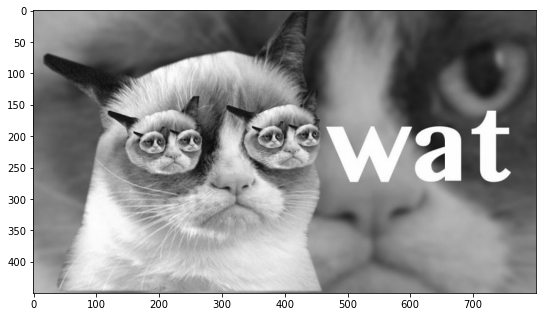

In [35]:
img = Image.open('test.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

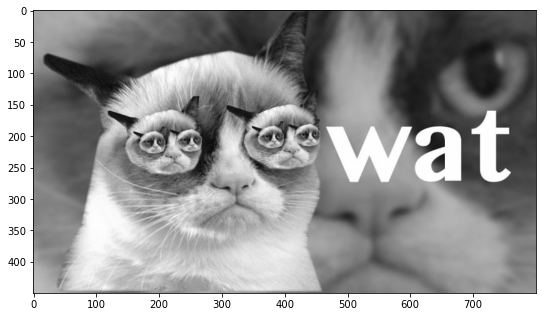

In [36]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [42]:
U, sigma, V = np.linalg.svd(imgmat)

Вычисление аппроксимации изображения с использованием первого столбца U и первый ряд В воспроизводит самую заметную часть изображения, светлую область вверху и темную область внизу. Темнота арки создает дополнительную темноту в середине реконструкции. Каждый столбец пикселей в этом изображении представляет собой различный вес одних и тех же значений $\overline{u_1}$:

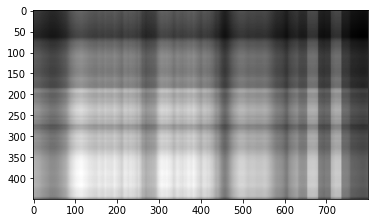

In [43]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

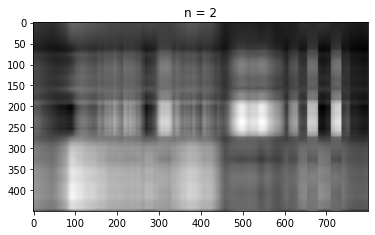

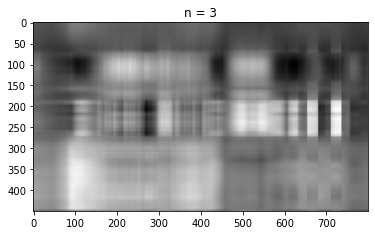

In [44]:
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

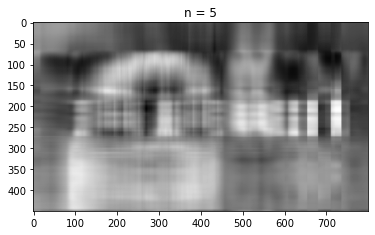

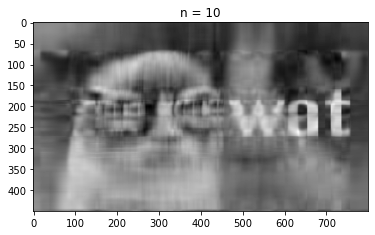

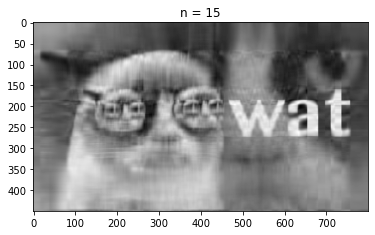

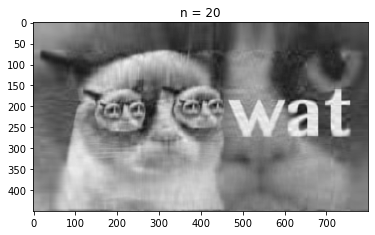

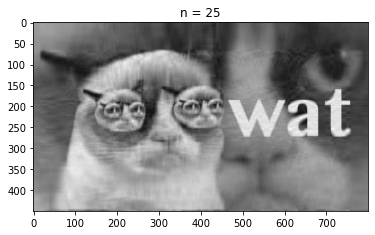

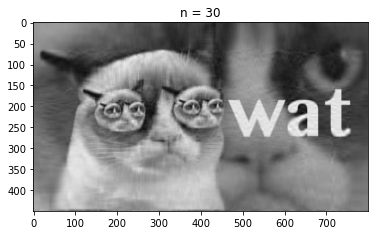

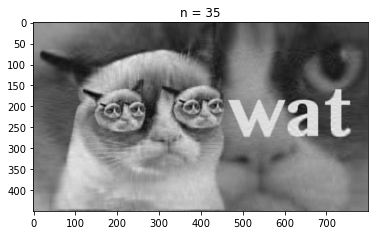

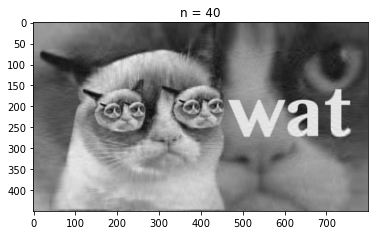

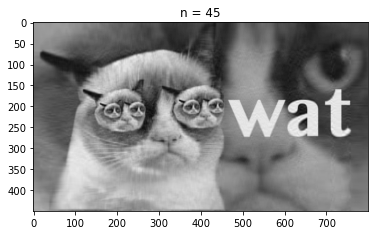

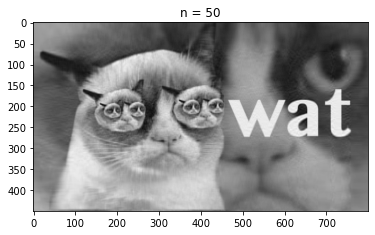

In [45]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

u.shape:(3648, 3648),s.shape:(3648,),v.shape:(3648, 5472)
variance Explained by Top 20 singular values:
[9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04 7.4000e-05
 5.7000e-05 3.9000e-05 3.1000e-05 2.6000e-05 2.2000e-05 1.9000e-05
 1.5000e-05 1.4000e-05 1.1000e-05 9.0000e-06 9.0000e-06 7.0000e-06
 7.0000e-06 6.0000e-06]


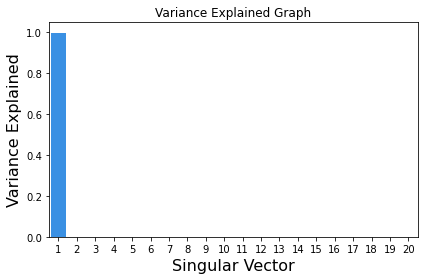

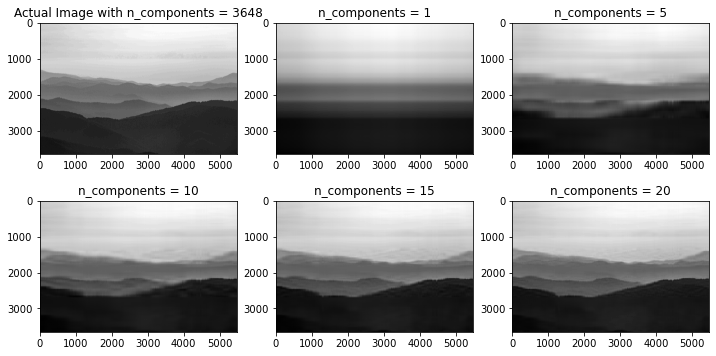

In [51]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# assign and open image
url = 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210401173418/Webp-compressed.jpg'
response = requests.get(url, stream=True)
 
with open('image.png', 'wb') as f:
    f.write(response.content)
 
img = cv2.imread('image.png')
 
# Converting the image into gray scale for faster
# computation.
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)
 
# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

# import module
import seaborn as sns

var_explained = np.round(s**2/np.sum(s**2), decimals=6)

# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x=list(range(1, 21)),
			y=var_explained[0:20], color="dodgerblue")

plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

# plot images with different number of components
comps = [3648, 1, 5, 10, 15, 20]
plt.figure(figsize=(12, 6))

for i in range(len(comps)):
	low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
	
	if(i == 0):
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'Actual Image with n_components = {comps[i]}')
	
	else:
		plt.subplot(2, 3, i+1),
		plt.imshow(low_rank, cmap='gray'),
		plt.title(f'n_components = {comps[i]}')
